In [7]:
import pandas as pd
from sklearn.preprocessing import LabelBinarizer, StandardScaler


df = pd.read_excel(r"excel\veri_on_isleme_ve_ozellik_muhendisligi.xlsx")

df

,ID,Cinsiyet,Yaş,Gelir,Meslek
0,1,Erkek,25,3000.0,Mühendis
1,2,Kadın,32,5000.0,Doktor
2,3,Kadın,45,NaN,Öğretmen
3,4,Erkek,22,3200.0,Avukat
4,5,Kadın,38,4500.0,Mühendis
5,6,Erkek,28,2900.0,Doktor
6,7,Kadın,33,5100.0,Öğretmen
7,8,Erkek,41,NaN,Avukat
8,9,Kadın,37,6000.0,Mühendis
9,10,Erkek,23,2700.0,Doktor


In [8]:
df.fillna(df['Gelir'].mean(), inplace=True)
le = LabelBinarizer()
df['Cinsiyet'] = le.fit_transform(df['Cinsiyet'])
df # 0 Erkek, 1 Kadın


,ID,Cinsiyet,Yaş,Gelir,Meslek
0,1,0,25,3000.00,Mühendis
1,2,1,32,5000.00,Doktor
2,3,1,45,4206.25,Öğretmen
3,4,0,22,3200.00,Avukat
4,5,1,38,4500.00,Mühendis
5,6,0,28,2900.00,Doktor
6,7,1,33,5100.00,Öğretmen
7,8,0,41,4206.25,Avukat
8,9,1,37,6000.00,Mühendis
9,10,0,23,2700.00,Doktor


In [9]:
# Z skorlama, Hammade ve Üretim gibi verilerin arasında aşırı fark varsa kullanılabilir.
# Kategorik verilerde kullanılması uygun değildir

scaler = StandardScaler()
df[['Yaş','Gelir']] = scaler.fit_transform(df[['Yaş','Gelir']])
df


,ID,Cinsiyet,Yaş,Gelir,Meslek
0,1,0,-1.083682,-1.265559,Mühendis
1,2,1,-0.285179,0.832777,Doktor
2,3,1,1.197753,0.000000,Öğretmen
3,4,0,-1.425897,-1.055725,Avukat
4,5,1,0.399251,0.308193,Mühendis
5,6,0,-0.741466,-1.370476,Doktor
6,7,1,-0.171108,0.937694,Öğretmen
7,8,0,0.741466,0.000000,Avukat
8,9,1,0.285179,1.881945,Mühendis
9,10,0,-1.311825,-1.580309,Doktor


In [10]:
df.drop('ID', axis=1, inplace=True)
df['Gelir_Grubu'] = pd.cut(df['Gelir'], bins=[0,3000,5000,7000],labels=["Düşük","Orta","Yüksek"])
df.to_excel('Kategorik_Gelir.xlsx', index=False)
df

,Cinsiyet,Yaş,Gelir,Meslek,Gelir_Grubu
0,0,-1.083682,-1.265559,Mühendis,NaN
1,1,-0.285179,0.832777,Doktor,Düşük
2,1,1.197753,0.000000,Öğretmen,NaN
3,0,-1.425897,-1.055725,Avukat,NaN
4,1,0.399251,0.308193,Mühendis,Düşük
5,0,-0.741466,-1.370476,Doktor,NaN
6,1,-0.171108,0.937694,Öğretmen,Düşük
7,0,0.741466,0.000000,Avukat,NaN
8,1,0.285179,1.881945,Mühendis,Düşük
9,0,-1.311825,-1.580309,Doktor,NaN


---
# Düzenlenmiş Verileri Görselleştirme

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel(r"excel\veri_on_isleme_ve_ozellik_muhendisligi.xlsx")
df.fillna(df['Gelir'].mean(), inplace=True)
df['Gelir_Grubu'] = pd.cut(df['Gelir'], bins=[0,3000,5000,7000],labels=["Düşük","Orta","Yüksek"])
df

,ID,Cinsiyet,Yaş,Gelir,Meslek,Gelir_Grubu
0,1,Erkek,25,3000.00,Mühendis,Düşük
1,2,Kadın,32,5000.00,Doktor,Orta
2,3,Kadın,45,4206.25,Öğretmen,Orta
3,4,Erkek,22,3200.00,Avukat,Orta
4,5,Kadın,38,4500.00,Mühendis,Orta
5,6,Erkek,28,2900.00,Doktor,Düşük
6,7,Kadın,33,5100.00,Öğretmen,Yüksek
7,8,Erkek,41,4206.25,Avukat,Orta
8,9,Kadın,37,6000.00,Mühendis,Yüksek
9,10,Erkek,23,2700.00,Doktor,Düşük


<module 'matplotlib.pyplot' from 'c:\\Users\\amate\\Desktop\\Uni\\Python_ve_Yapay_Zekaya_Giris\\python-kutuphaneler\\env\\Lib\\site-packages\\matplotlib\\pyplot.py'>

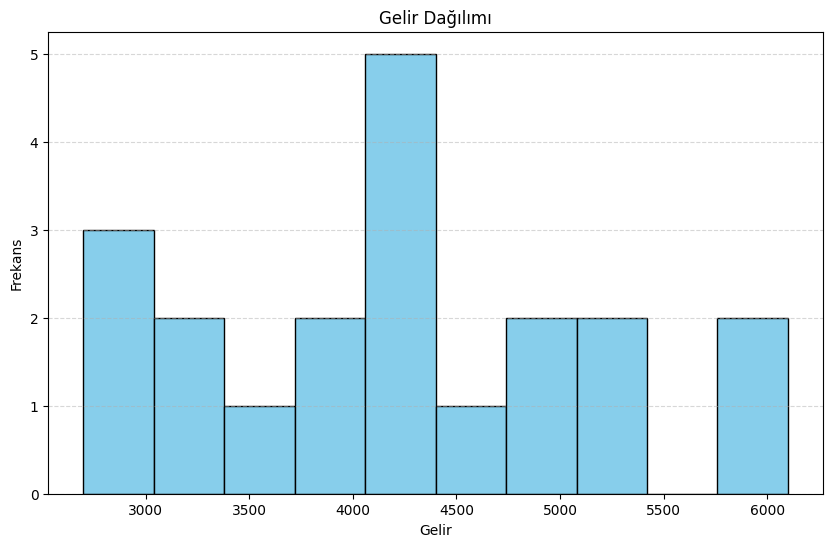

In [12]:
plt.figure(figsize=(10,6))
plt.hist(df['Gelir'],bins=10,color='skyblue',edgecolor='black')
plt.title('Gelir Dağılımı')
plt.xlabel('Gelir')
plt.ylabel('Frekans')
plt.grid(axis='y', alpha=0.5, linestyle='--')
plt

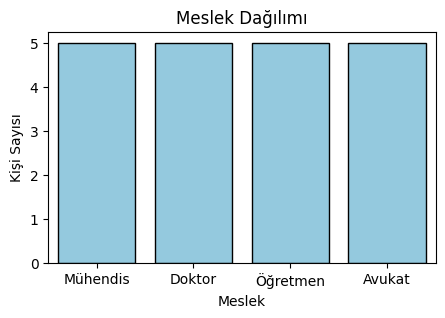

In [13]:
plt.figure(figsize=(5,3))

# countplot: Kategorik veriyi sayar ve çubuk grafiği çizer
sns.countplot(x=df['Meslek'], color='skyblue', edgecolor='black')
plt.ylabel('Kişi Sayısı')
plt.title('Meslek Dağılımı')
plt.show()

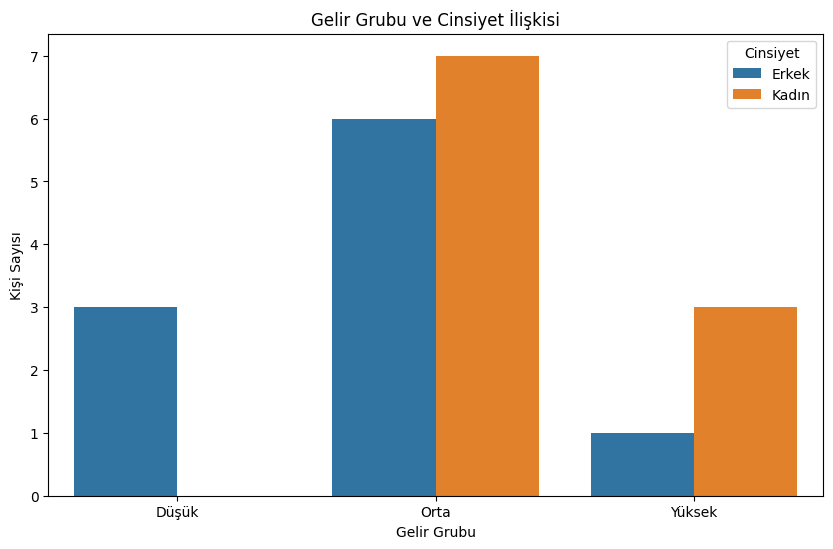

In [14]:
plt.figure(figsize=(10,6))

sns.countplot(x='Gelir_Grubu', hue='Cinsiyet', data=df)
plt.ylabel('Kişi Sayısı')
plt.xlabel('Gelir Grubu')
plt.title('Gelir Grubu ve Cinsiyet İlişkisi')
plt.show()

---
# Yaş ve Meslek ile Gelir Tahmin Modeli

In [15]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_excel(r'excel\veri_on_isleme_ve_ozellik_muhendisligi.xlsx')
df.fillna(df['Gelir'].mean(), inplace=True)
df

,ID,Cinsiyet,Yaş,Gelir,Meslek
0,1,Erkek,25,3000.00,Mühendis
1,2,Kadın,32,5000.00,Doktor
2,3,Kadın,45,4206.25,Öğretmen
3,4,Erkek,22,3200.00,Avukat
4,5,Kadın,38,4500.00,Mühendis
5,6,Erkek,28,2900.00,Doktor
6,7,Kadın,33,5100.00,Öğretmen
7,8,Erkek,41,4206.25,Avukat
8,9,Kadın,37,6000.00,Mühendis
9,10,Erkek,23,2700.00,Doktor


In [16]:
le = LabelEncoder()
df['Cinsiyet'] = le.fit_transform(df['Cinsiyet'])
df['Meslek'] = le.fit_transform(df['Meslek'])
df
# 0 Erkek, 1 Kadın
# 0 Avukat, 1 Doktor, 2 Mühendis, 3 Öğretmen

,ID,Cinsiyet,Yaş,Gelir,Meslek
0,1,0,25,3000.00,2
1,2,1,32,5000.00,1
2,3,1,45,4206.25,3
3,4,0,22,3200.00,0
4,5,1,38,4500.00,2
5,6,0,28,2900.00,1
6,7,1,33,5100.00,3
7,8,0,41,4206.25,0
8,9,1,37,6000.00,2
9,10,0,23,2700.00,1


In [17]:
X = df[['Yaş','Meslek']]
y = df['Gelir']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42) 

model = LinearRegression()
model.fit(X_train,y_train)
accuary = model.score(X_test,y_test)
print(f"Model doğruluk oranı: {accuary * 100:.2f}%")

yas = int(input('Yaş: '))
meslek = input('Meslek (Avukat, Doktor, Mühendis, Öğretmen): ')

meslek_kod = le.transform([meslek])[0]


yeni_veri = pd.DataFrame([[yas,meslek_kod]], columns=['Yaş','Meslek'])

tahmin = model.predict(yeni_veri)
print(f'Yaş: {yas},\nMeslek: {meslek},\nTahmini ortalama maaş: {tahmin[0]:.2f}TL')


Model doğruluk oranı: 39.10%
Yaş: 25,
Meslek: Doktor,
Tahmini ortalama maaş: 3779.53TL


### Gelişmiş Modelleme ile Doğruluk Oranını Arttırma

In [18]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_excel(r'excel\veri_on_isleme_ve_ozellik_muhendisligi.xlsx')
df.fillna(df['Gelir'].mean(), inplace=True)
le = LabelEncoder()
df['Cinsiyet'] = le.fit_transform(df['Cinsiyet'])
df['Meslek'] = le.fit_transform(df['Meslek'])

df

,ID,Cinsiyet,Yaş,Gelir,Meslek
0,1,0,25,3000.00,2
1,2,1,32,5000.00,1
2,3,1,45,4206.25,3
3,4,0,22,3200.00,0
4,5,1,38,4500.00,2
5,6,0,28,2900.00,1
6,7,1,33,5100.00,3
7,8,0,41,4206.25,0
8,9,1,37,6000.00,2
9,10,0,23,2700.00,1


In [ ]:
# 0 Erkek, 1 Kadın
# 0 Avukat, 1 Doktor, 2 Mühendis, 3 Öğretmen
X = df[['Yaş','Meslek','Cinsiyet']]
y = df['Gelir']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42) 

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

linear_model = LinearRegression()
linear_model.fit(X_train,y_train)
lienar_accuary = linear_model.score(X_test,y_test)
print(f"Linear Model doğruluk oranı: {lienar_accuary * 100:.2f}%")

rf_model = RandomForestRegressor(n_estimators=100, random_state=1)
rf_model.fit(X_train,y_train)
rf_accuary = rf_model.score(X_test,y_test)
print(f"Random Forest Model doğruluk oranı: {rf_accuary * 100:.2f}%")

yas = int(input('Yaş: '))
meslek = input('Meslek (Avukat, Doktor, Mühendis, Öğretmen): ')
cinsiyet = input('Cinsiyet (Erkek, Kadın): ')

meslek_kod = le.transform([meslek])[0]

if cinsiyet == 'Erkek':
    cinsiyet_kod = 0
elif cinsiyet == 'Kadın':
    cinsiyet_kod = 1
else:
    raise ValueError('Tanımlanamayan Cinsiyet!')

yeni_veri = pd.DataFrame([[yas,meslek_kod,cinsiyet_kod]], columns=['Yaş','Meslek','Cinsiyet'])
yeni_veri_scaled = scaler.transform(yeni_veri)
tahmin = rf_model.predict(yeni_veri_scaled)
print(f'Yaş: {yas},\nMeslek: {meslek},\nCinsiyet: {cinsiyet},\nTahmini ortalama maaş: {tahmin[0]:.2f}TL')



Linear Model doğruluk oranı: 71.38%
Random Forest Model doğruluk oranı: 80.35%
Yaş: 25,
Meslek: Avukat,
Cinsiyet: Kadın,
Tahmini ortalama maaş: 3081.00TL
